# IMPORT NEEDED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [2]:
vaccinations_by_manufacturer = pd.read_csv("D:/ibm naan mudhalvan/country_vaccinations_by_manufacturer.csv")
vaccinations_data = pd.read_csv("D:/ibm naan mudhalvan/country_vaccinations.csv")

In [3]:
vaccinations_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
vaccinations_by_manufacturer

,location,date,vaccine,total_vaccinations
0,Argentina,29-12-2020,Moderna,2
1,Argentina,29-12-2020,Oxford/AstraZeneca,3
2,Argentina,29-12-2020,Sinopharm/Beijing,1
3,Argentina,29-12-2020,Sputnik V,20481
4,Argentina,30-12-2020,Moderna,2
...,...,...,...,...
35618,European Union,29-03-2022,Oxford/AstraZeneca,67403106
35619,European Union,29-03-2022,Pfizer/BioNTech,600519998
35620,European Union,29-03-2022,Sinopharm/Beijing,2301516
35621,European Union,29-03-2022,Sinovac,1809


# DATA PREPROCESSING AND EDA

In [5]:
vaccinations_by_manufacturer.info()
vaccinations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 n

In [6]:
vaccinations_by_manufacturer.rename(columns={'location': 'country'}, inplace=True)

In [7]:
# Convert the 'date' column to datetime
vaccinations_by_manufacturer['date'] = pd.to_datetime(vaccinations_by_manufacturer['date'])
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# Check for common columns for merging
common_columns = ['country', 'date']

# Merge the datasets on the common columns
merged_df = pd.merge(vaccinations_data, vaccinations_by_manufacturer, on=common_columns, how='inner')

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28954 entries, 0 to 28953
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              28954 non-null  object        
 1   iso_code                             28954 non-null  object        
 2   date                                 28954 non-null  datetime64[ns]
 3   total_vaccinations_x                 27018 non-null  float64       
 4   people_vaccinated                    26356 non-null  float64       
 5   people_fully_vaccinated              26442 non-null  float64       
 6   daily_vaccinations_raw               26497 non-null  float64       
 7   daily_vaccinations                   28923 non-null  float64       
 8   total_vaccinations_per_hundred       27018 non-null  float64       
 9   people_vaccinated_per_hundred        26356 non-null  float64       
 10  people_ful

In [9]:
print(vaccinations_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

In [10]:
print(vaccinations_by_manufacturer.describe())

       total_vaccinations
count        3.562300e+04
mean         1.508357e+07
std          5.181768e+07
min          0.000000e+00
25%          9.777600e+04
50%          1.305506e+06
75%          7.932423e+06
max          6.005200e+08


In [11]:
print(merged_df.describe())

       total_vaccinations_x  people_vaccinated  people_fully_vaccinated  \
count          2.701800e+04       2.635600e+04             2.644200e+04   
mean           4.145588e+07       2.173495e+07             1.781408e+07   
std            7.839012e+07       3.948117e+07             3.427411e+07   
min            1.000000e+00       1.000000e+00             1.000000e+00   
25%            2.568560e+06       1.526178e+06             1.001473e+06   
50%            1.175507e+07       6.129479e+06             5.180098e+06   
75%            4.690237e+07       2.884636e+07             1.870244e+07   
max            5.601818e+08       2.553624e+08             2.174990e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            2.649700e+04        2.892300e+04   
mean             2.011788e+05        1.876768e+05   
std              3.716247e+05        3.296631e+05   
min              0.000000e+00        0.000000e+00   
25%              1.525700e+04        1.749550e+04   
50%   

In [12]:
print(vaccinations_data.isnull().sum())

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64


In [13]:
print(vaccinations_by_manufacturer.isnull().sum())

country               0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64


In [14]:
print(merged_df.isnull().sum())

country                                   0
iso_code                                  0
date                                      0
total_vaccinations_x                   1936
people_vaccinated                      2598
people_fully_vaccinated                2512
daily_vaccinations_raw                 2457
daily_vaccinations                       31
total_vaccinations_per_hundred         1936
people_vaccinated_per_hundred          2598
people_fully_vaccinated_per_hundred    2512
daily_vaccinations_per_million           31
vaccines                                  0
source_name                               0
source_website                            0
vaccine                                   0
total_vaccinations_y                      0
dtype: int64


In [15]:
# Handle missing values
merged_df.dropna(subset=['total_vaccinations_x'], inplace=True)
merged_df.fillna(0, inplace=True)  # Replace NaN with 0 for certain columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27018 entries, 0 to 28953
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              27018 non-null  object        
 1   iso_code                             27018 non-null  object        
 2   date                                 27018 non-null  datetime64[ns]
 3   total_vaccinations_x                 27018 non-null  float64       
 4   people_vaccinated                    27018 non-null  float64       
 5   people_fully_vaccinated              27018 non-null  float64       
 6   daily_vaccinations_raw               27018 non-null  float64       
 7   daily_vaccinations                   27018 non-null  float64       
 8   total_vaccinations_per_hundred       27018 non-null  float64       
 9   people_vaccinated_per_hundred        27018 non-null  float64       
 10  people_ful

# VISUALIZATION

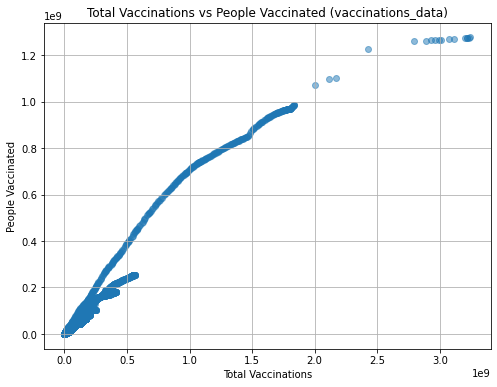

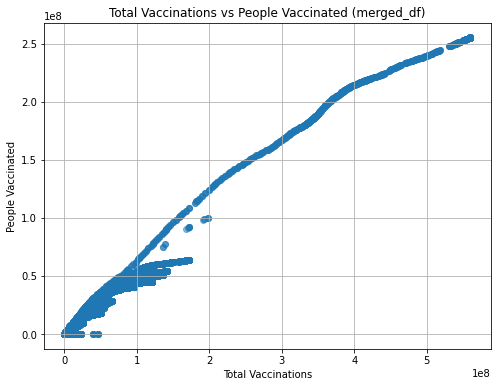

In [16]:
# Create a scatter plot for 'total_vaccinations' vs 'people_vaccinated' in 'vaccinations_data'
plt.figure(figsize=(8, 6))
plt.scatter(vaccinations_data['total_vaccinations'], vaccinations_data['people_vaccinated'], alpha=0.5)
plt.title('Total Vaccinations vs People Vaccinated (vaccinations_data)')
plt.xlabel('Total Vaccinations')
plt.ylabel('People Vaccinated')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(merged_df['total_vaccinations_x'], merged_df['people_vaccinated'], alpha=0.5)
plt.title('Total Vaccinations vs People Vaccinated (merged_df)')
plt.xlabel('Total Vaccinations')
plt.ylabel('People Vaccinated')
plt.grid(True)
plt.show()


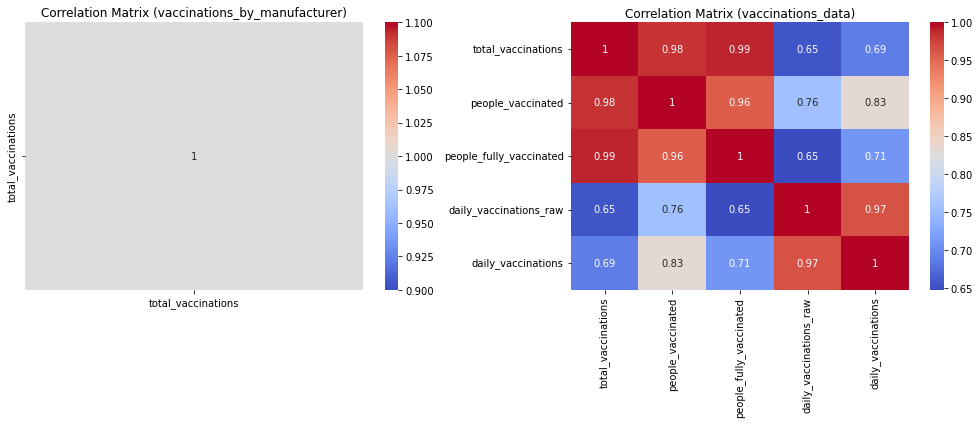

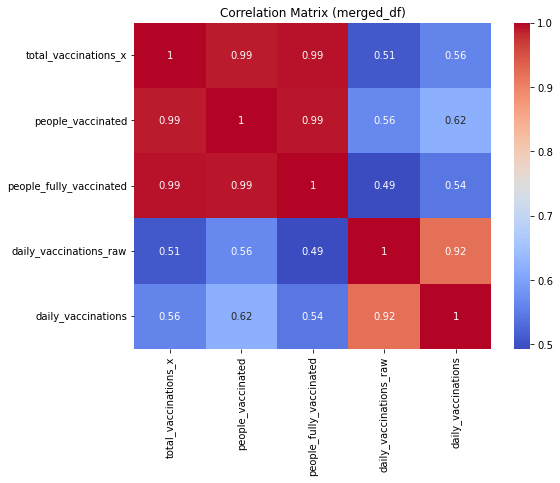

In [17]:
relevant_cols_manufacturer = ['total_vaccinations']
relevant_cols_data = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations']

# Create a correlation matrix for 'vaccinations_by_manufacturer'
corr_matrix_manufacturer = vaccinations_by_manufacturer[relevant_cols_manufacturer].corr()

# Create a correlation matrix for 'vaccinations_data'
corr_matrix_data = vaccinations_data[relevant_cols_data].corr()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the correlation matrix for 'vaccinations_by_manufacturer'
sns.heatmap(corr_matrix_manufacturer, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix (vaccinations_by_manufacturer)')
plt.tight_layout()

# Plot the correlation matrix for 'vaccinations_data'
sns.heatmap(corr_matrix_data, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix (vaccinations_data)')
plt.tight_layout()

plt.show()


relevant_cols_merged = ['total_vaccinations_x', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations']

# Create a correlation matrix for 'merged_df'
corr_matrix_merged = merged_df[relevant_cols_merged].corr()

# Create a figure with a subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the correlation matrix for 'merged_df'
sns.heatmap(corr_matrix_merged, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix (merged_df)')

plt.show()

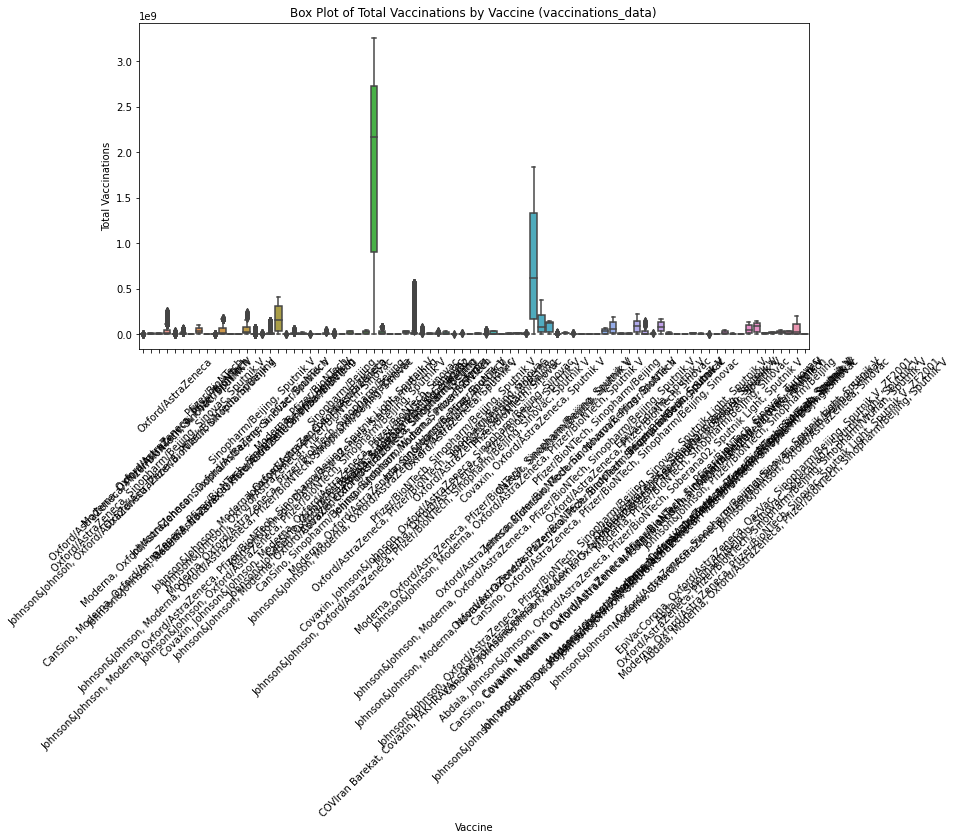

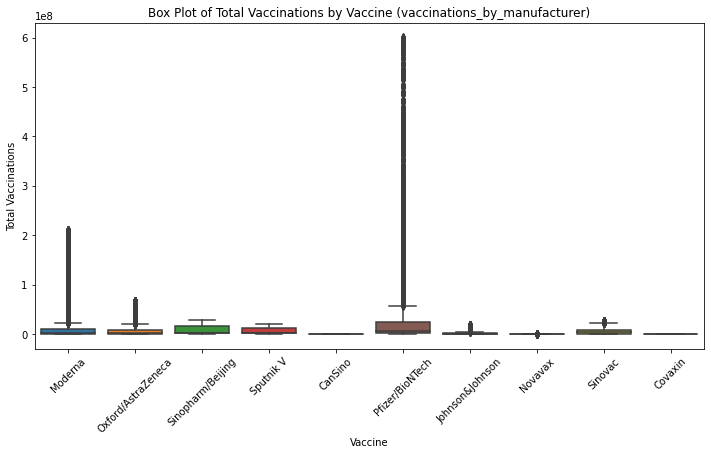

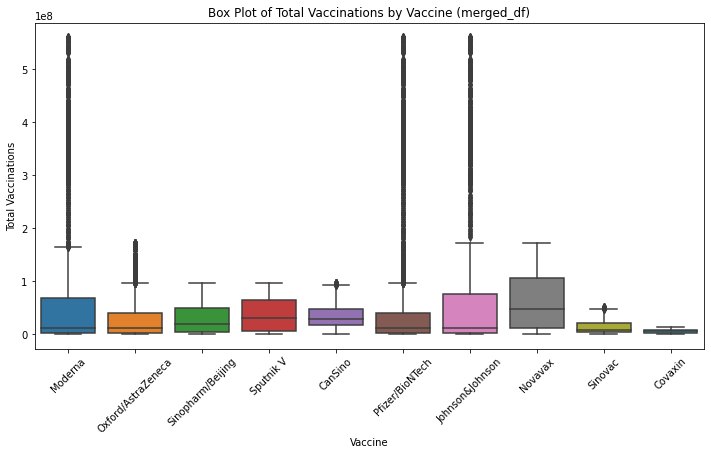

In [18]:
# Create a box plot to identify outliers for 'total_vaccinations' by vaccine category
plt.figure(figsize=(12, 6))
sns.boxplot(data=vaccinations_data, x='vaccines', y='total_vaccinations')
plt.title('Box Plot of Total Vaccinations by Vaccine (vaccinations_data)')
plt.xlabel('Vaccine')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.show()


# Create a box plot to identify outliers for 'total_vaccinations' by vaccine category
plt.figure(figsize=(12, 6))
sns.boxplot(data=vaccinations_by_manufacturer, x='vaccine', y='total_vaccinations')
plt.title('Box Plot of Total Vaccinations by Vaccine (vaccinations_by_manufacturer)')
plt.xlabel('Vaccine')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.show()



plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='vaccine', y='total_vaccinations_x')
plt.title('Box Plot of Total Vaccinations by Vaccine (merged_df)')
plt.xlabel('Vaccine')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.show()


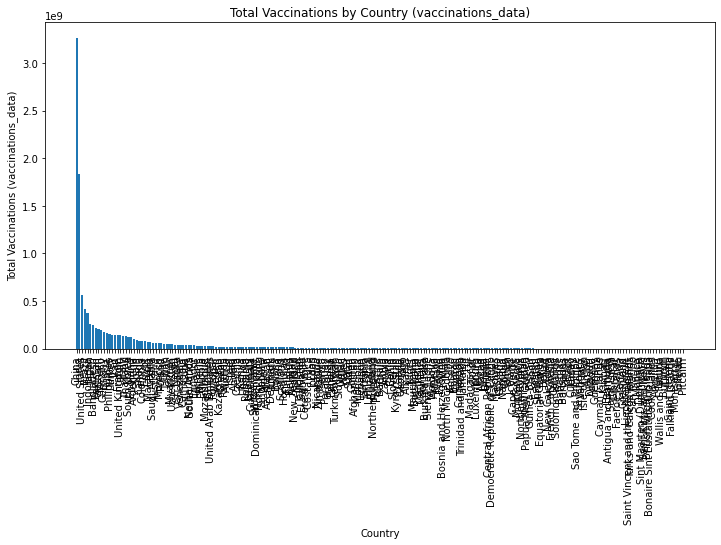

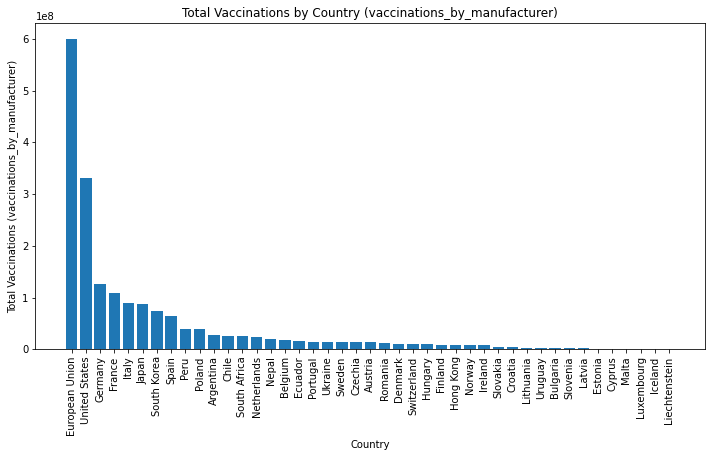

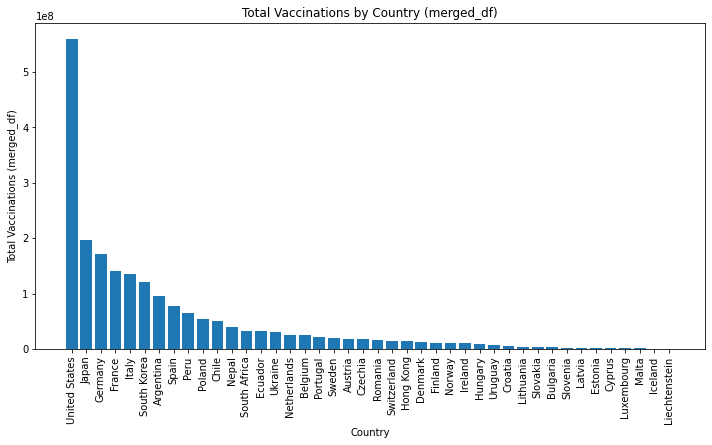

In [19]:

# Group the data by 'country' and calculate the total vaccinations for each country
country_totals_data = vaccinations_data.groupby('country')['total_vaccinations'].max().reset_index()

# Sort the data by total vaccinations in descending order
country_totals_data = country_totals_data.sort_values(by='total_vaccinations', ascending=False)

# Create a bar chart for 'total_vaccinations' in 'vaccinations_data'
plt.figure(figsize=(12, 6))  
plt.bar(country_totals_data['country'], country_totals_data['total_vaccinations'])

plt.xlabel('Country')
plt.ylabel('Total Vaccinations (vaccinations_data)')
plt.title('Total Vaccinations by Country (vaccinations_data)')

plt.xticks(rotation=90)
plt.show()


country_totals_manufacturer = vaccinations_by_manufacturer.groupby('country')['total_vaccinations'].max().reset_index()

country_totals_manufacturer = country_totals_manufacturer.sort_values(by='total_vaccinations', ascending=False)

# Create a bar chart for 'total_vaccinations' in 'vaccinations_by_manufacturer'
plt.figure(figsize=(12, 6)) 
plt.bar(country_totals_manufacturer['country'], country_totals_manufacturer['total_vaccinations'])

plt.xlabel('Country')
plt.ylabel('Total Vaccinations (vaccinations_by_manufacturer)')
plt.title('Total Vaccinations by Country (vaccinations_by_manufacturer)')

plt.xticks(rotation=90)
plt.show()

country_totals_merged = merged_df.groupby('country')['total_vaccinations_x'].max().reset_index()

country_totals_merged = country_totals_merged.sort_values(by='total_vaccinations_x', ascending=False)

# Create a bar chart for 'total_vaccinations_x' in 'merged_df'
plt.figure(figsize=(12, 6))  
plt.bar(country_totals_merged['country'], country_totals_merged['total_vaccinations_x'])

plt.xlabel('Country')
plt.ylabel('Total Vaccinations (merged_df)')
plt.title('Total Vaccinations by Country (merged_df)')

plt.xticks(rotation=90)
plt.show()


# STATISTICAL ANALYSIS

In [20]:
# Example: T-test for vaccine efficacy comparison

import scipy.stats as stats


vaccine_a_data = vaccinations_data[vaccinations_data['vaccines'] == 'Vaccine A']['total_vaccinations_per_hundred']
vaccine_b_data = vaccinations_data[vaccinations_data['vaccines'] == 'Vaccine B']['total_vaccinations_per_hundred']


# Perform a t-test for comparing the means of "Vaccine A" and "Vaccine B"
t_statistic, p_value = stats.ttest_ind(vaccine_a_data, vaccine_b_data, equal_var=False)

# Print the results
if p_value < 0.05:  # You can adjust the significance level (alpha)
    print("There is a significant difference in vaccine efficacy between Vaccine A and Vaccine B.")
else:
    print("There is no significant difference in vaccine efficacy between Vaccine A and Vaccine B.")

There is no significant difference in vaccine efficacy between Vaccine A and Vaccine B.


In [21]:

country_a = 'Country A'
country_b = 'Country B'


total_vaccinations_country_a = vaccinations_data[vaccinations_data['country'] == country_a]['total_vaccinations']
total_vaccinations_country_b = vaccinations_data[vaccinations_data['country'] == country_b]['total_vaccinations']

# Perform a two-sample t-test to compare the means of the two countries
t_statistic, p_value = stats.ttest_ind(total_vaccinations_country_a, total_vaccinations_country_b, equal_var=False)

# Print the t-statistics and p-value
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Print the results
if p_value < 0.05:  # You can adjust the significance level (alpha)
    print(f"There is a significant difference in total vaccinations between {country_a} and {country_b}.")
else:
    print(f"There is no significant difference in total vaccinations between {country_a} and {country_b}.")

T-Statistic: nan
P-Value: nan
There is no significant difference in total vaccinations between Country A and Country B.


# VACCINES EFFICACY

In [22]:
# Calculate attack rates
merged_df['attack_rate_vaccinated'] = merged_df['people_fully_vaccinated'] / merged_df['total_vaccinations_x']
merged_df['attack_rate_unvaccinated'] = (merged_df['total_vaccinations_x'] - merged_df['people_fully_vaccinated']) / merged_df['total_vaccinations_x']

# Calculate vaccine efficacy
merged_df['vaccine_efficacy'] = (1 - (merged_df['attack_rate_unvaccinated'] / merged_df['attack_rate_vaccinated'])) * 100

# Display the dataset with vaccine efficacy
print(merged_df[['country', 'vaccine', 'date', 'vaccine_efficacy']])

         country             vaccine       date  vaccine_efficacy
0      Argentina             Moderna 2020-12-29    -409540.000000
1      Argentina  Oxford/AstraZeneca 2020-12-29    -409540.000000
2      Argentina   Sinopharm/Beijing 2020-12-29    -409540.000000
3      Argentina           Sputnik V 2020-12-29    -409540.000000
4      Argentina             Moderna 2020-12-30    -405690.000000
...          ...                 ...        ...               ...
28949    Uruguay     Pfizer/BioNTech 2022-03-28        -82.106766
28950    Uruguay             Sinovac 2022-03-28        -82.106766
28951    Uruguay  Oxford/AstraZeneca 2022-03-29        -82.420469
28952    Uruguay     Pfizer/BioNTech 2022-03-29        -82.420469
28953    Uruguay             Sinovac 2022-03-29        -82.420469

[27018 rows x 4 columns]


# DISTRIBUTIONS

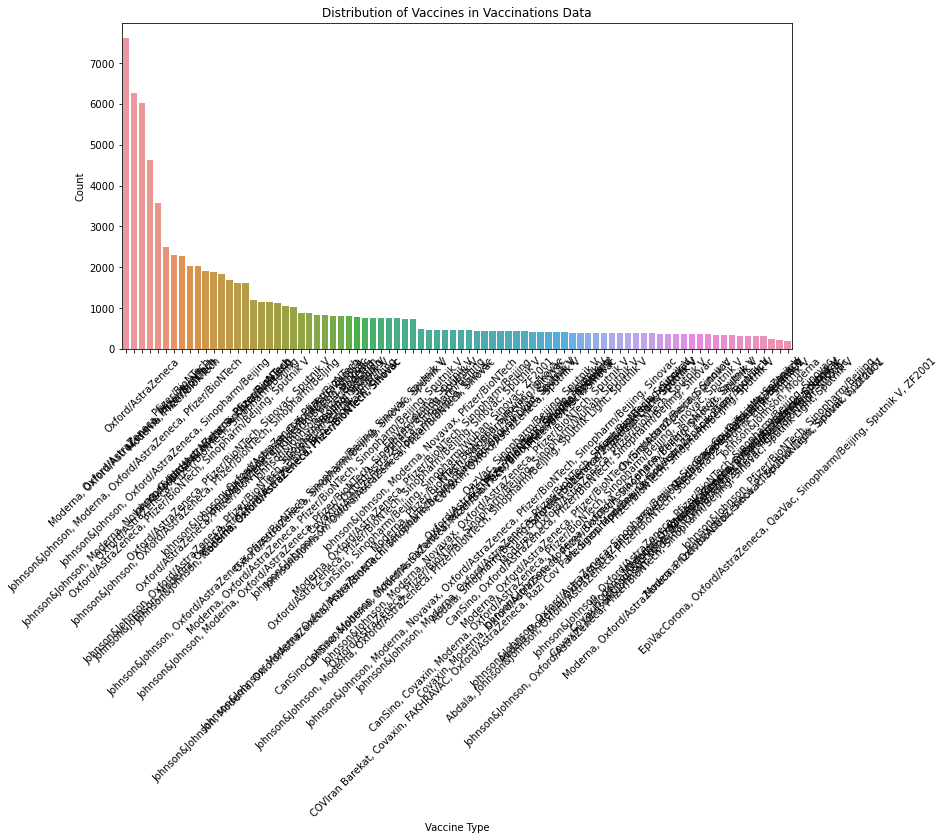

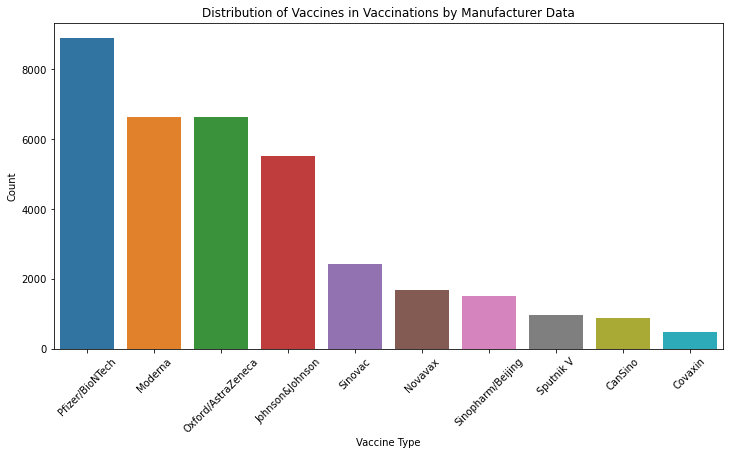

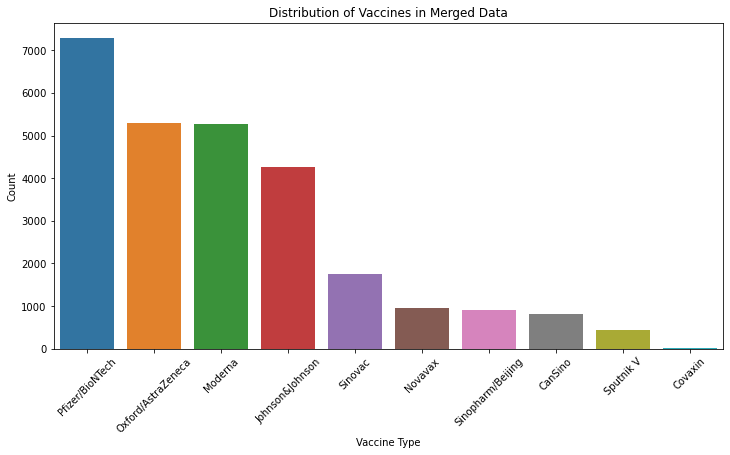

In [23]:

# Create a count plot for the distribution of vaccines in 'vaccinations_data'
plt.figure(figsize=(12, 6))
sns.countplot(data=vaccinations_data, x='vaccines', order=vaccinations_data['vaccines'].value_counts().index)
plt.title('Distribution of Vaccines in Vaccinations Data')
plt.xlabel('Vaccine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Create a count plot for the distribution of vaccines in 'vaccinations_by_manufacturer'
plt.figure(figsize=(12, 6))
sns.countplot(data=vaccinations_by_manufacturer, x='vaccine', order=vaccinations_by_manufacturer['vaccine'].value_counts().index)
plt.title('Distribution of Vaccines in Vaccinations by Manufacturer Data')
plt.xlabel('Vaccine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a count plot for the distribution of vaccines in 'merged_df'
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='vaccine', order=merged_df['vaccine'].value_counts().index)
plt.title('Distribution of Vaccines in Merged Data')
plt.xlabel('Vaccine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

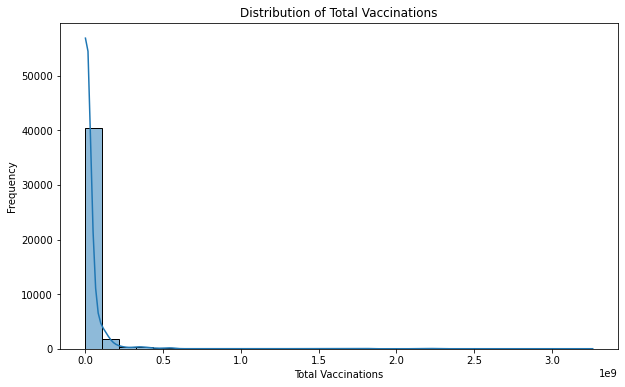

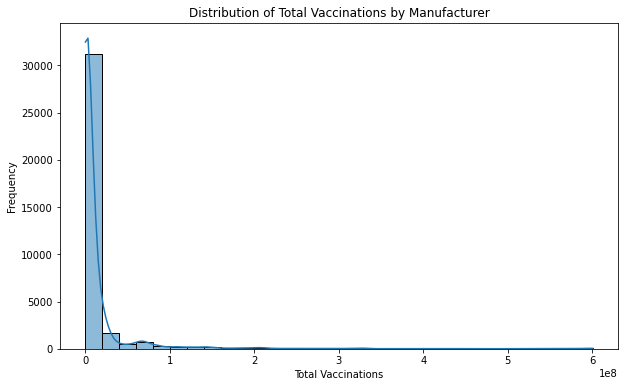

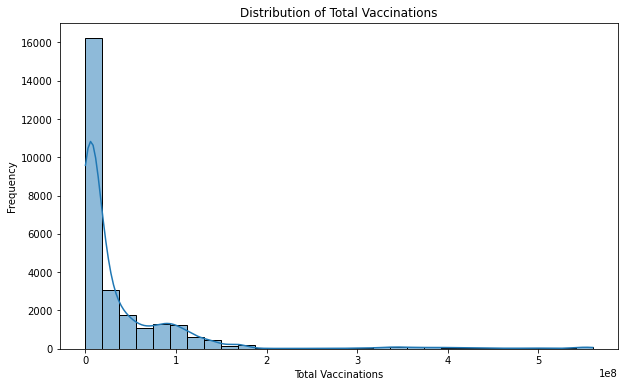

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=vaccinations_data, x='total_vaccinations', bins=30, kde=True)
plt.title('Distribution of Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=vaccinations_by_manufacturer, x='total_vaccinations', bins=30, kde=True)
plt.title('Distribution of Total Vaccinations by Manufacturer')
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()


# Create a histogram for 'total_vaccinations' in merged_df
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='total_vaccinations_x', bins=30, kde=True)
plt.title('Distribution of Total Vaccinations')
plt.xlabel('Total Vaccinations')
plt.ylabel('Frequency')
plt.show()

# ADVERSE EFFECTS

In [25]:
vaccinations_data.rename(columns={'vaccines': 'vaccine'}, inplace=True)

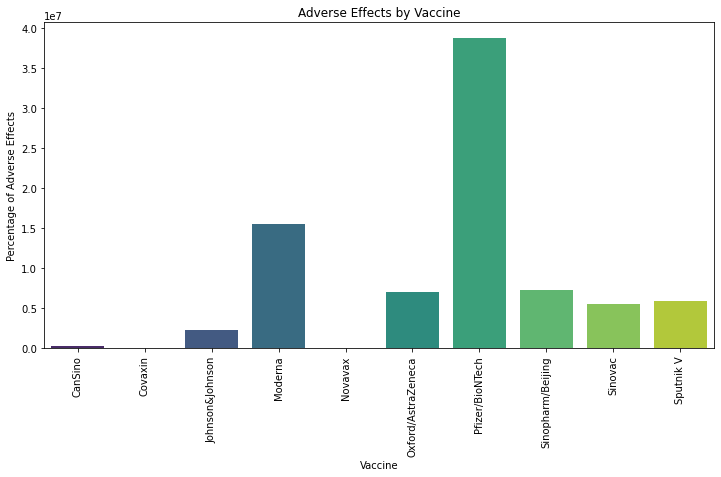

In [26]:
merged_data_adverse=vaccinations_by_manufacturer.merge(vaccinations_data, on=['date', 'country', 'vaccine'], how='left')


adverse_effects_by_vaccine = merged_data_adverse.groupby('vaccine')['total_vaccinations_x'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=adverse_effects_by_vaccine.index, y=adverse_effects_by_vaccine.values, palette='viridis')
plt.xlabel('Vaccine')
plt.ylabel('Percentage of Adverse Effects')
plt.title('Adverse Effects by Vaccine')
plt.xticks(rotation=90)
plt.show()